<a href="https://colab.research.google.com/github/faseenasherin/DSA/blob/main/iriseg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from xgboost import XGBClassifier

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Dataset**

In [ ]:
iris=load_iris()
df_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["species"] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Preprocessing**

In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_iris.size

750

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df_iris.nunique()

,0
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
species,3


In [ ]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

**Data Cleaning**

In [ ]:
df_iris.duplicated().sum()

np.int64(1)

In [ ]:
df_iris=df_iris.drop_duplicates()

In [ ]:
df_iris.duplicated().sum()

np.int64(0)

In [ ]:
df_iris.shape

(149, 5)

In [ ]:
df_iris.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
encoder=LabelEncoder()
df_iris['species']=encoder.fit_transform(df_iris['species'])
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
df_iris['species'].value_counts()

,count
species,
0,50
1,50
2,49


**EDA+Visualization**

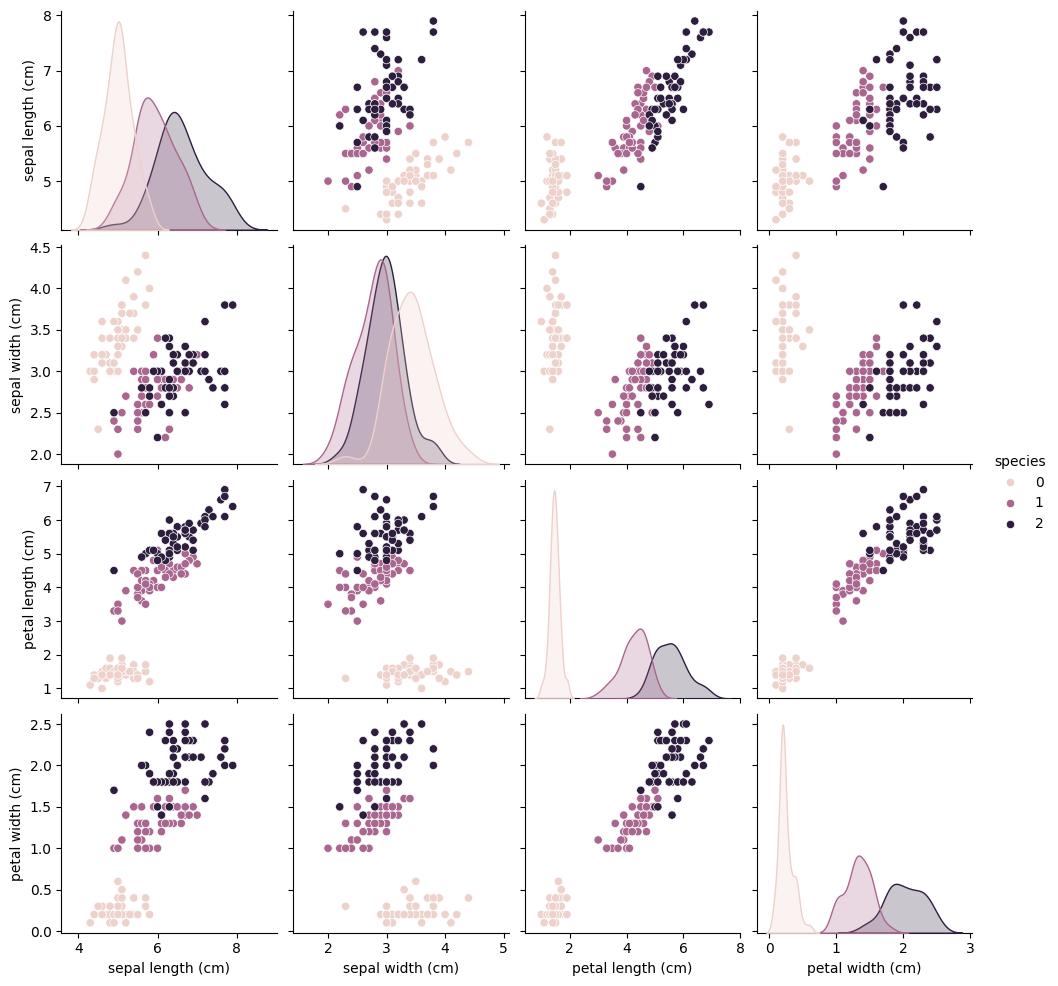

In [ ]:
sns.pairplot(df_iris, hue="species")
plt.show()

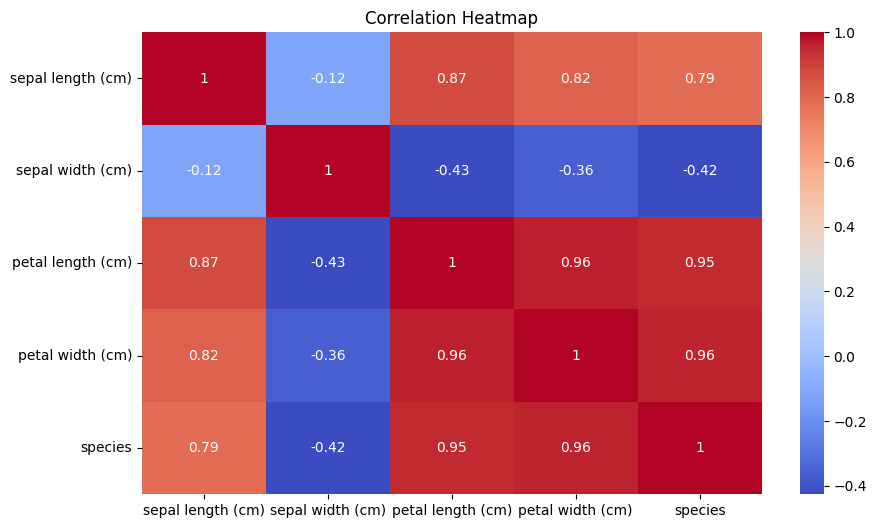

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_columns = df_iris.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm") # Calculate and display heatmap for numeric columns
plt.title("Correlation Heatmap")
plt.show()

In [ ]:


X = df_iris.drop("species", axis=1)
y = df_iris["species"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**OUTLIER HANDLING**

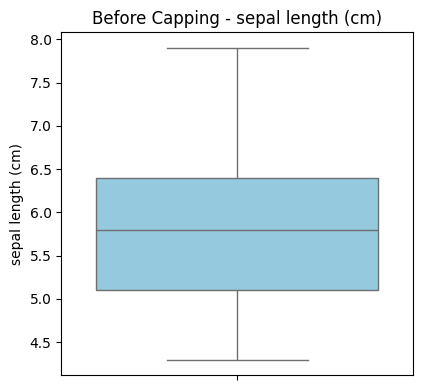

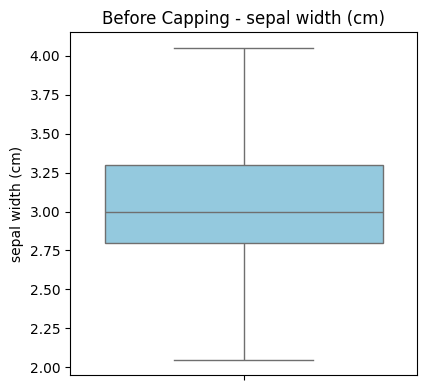

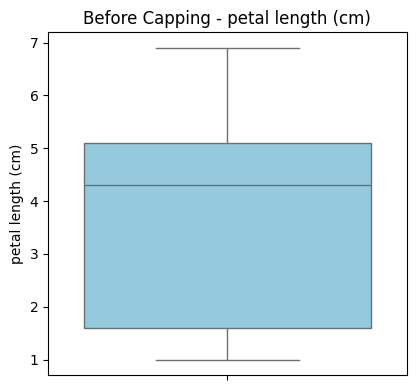

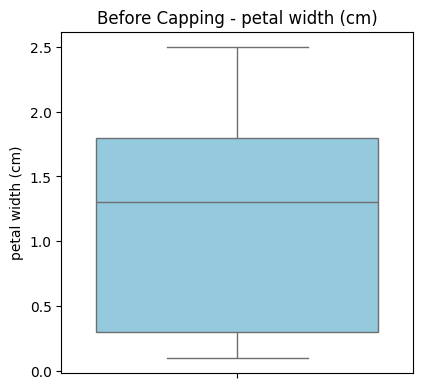

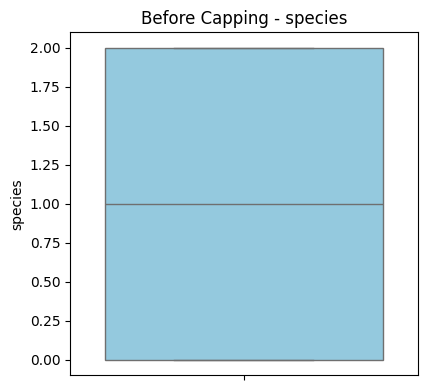

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8,4))

  plt.subplot(1,2,1)
  sns.boxplot(y=df_iris[col], color="skyblue")
  plt.title(f"Before Capping - {col}")
  plt.tight_layout()
  plt.show()

In [ ]:
for col in numeric_columns:
  if col == 'sepal_length' or col == 'petal_length' or col=='petal_width' or col=='species':
    continue   # skip capping for age and loan status

  Q1 = df_iris[col].quantile(0.25)
  Q3 = df_iris[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap values instead of removing
  df_iris[col] = np.where(df_iris[col] < lower_bound, lower_bound,
                            np.where(df_iris[col] > upper_bound, upper_bound, df_iris[col]))

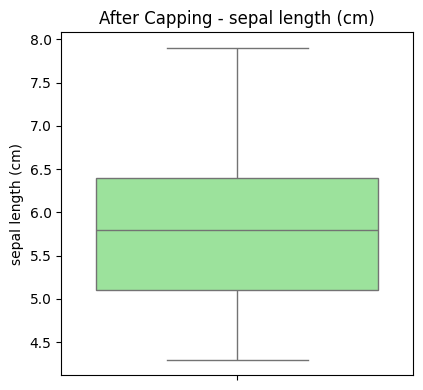

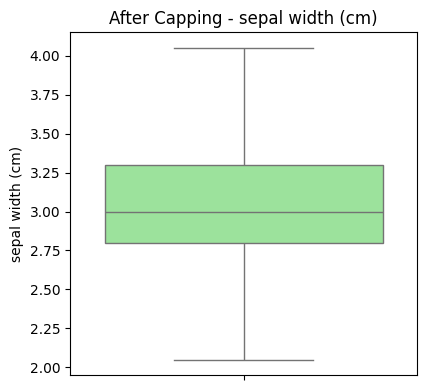

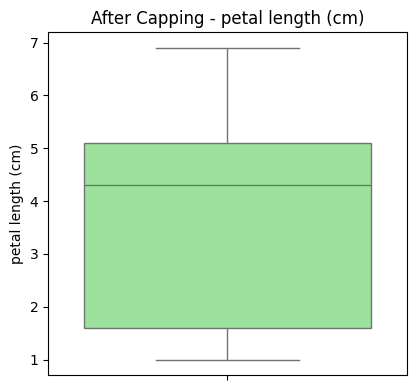

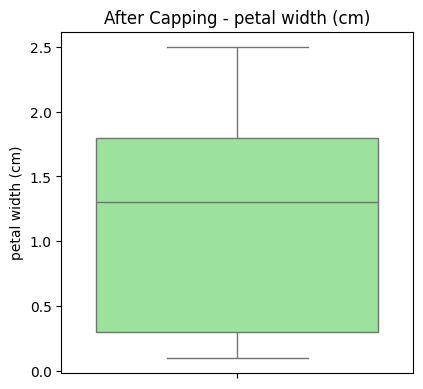

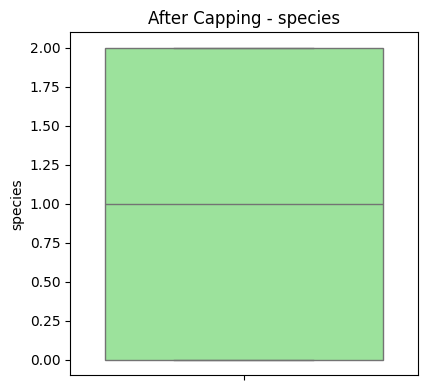

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8,4))

  plt.subplot(1,2,2)
  sns.boxplot(y = df_iris[col], color="lightgreen")
  plt.title(f"After Capping - {col}")

  plt.tight_layout()
  plt.show()

# **Model Building** **& Evaluation**

In [ ]:
# # Logistic Regression
# log_reg = LogisticRegression(max_iter=200)
# log_reg.fit(X_train, y_train)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)


RandomForestClassifier()

**Split Train/Test**

In [ ]:
#split data into train and test
from sklearn.model_selection import train_test_split
X=df_iris.drop('species',axis=1)
y=df_iris['species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Logestic Regression**

In [ ]:
#building Logistic regression model
log_reg_model=LogisticRegression()
log_reg_model.fit(x_train,y_train)#training the model
y_pred=log_reg_model.predict(x_test)#predicting the test data
#evaluate the model
Accuaracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

print("Accuracy",Accuaracy)
print("Precision",Precision)
print("Recall",recall)

Accuracy 1.0
Precision 1.0
Recall 1.0


In [ ]:
#prediction using threshold
y_pred_threshold=log_reg_model.predict_proba(x_test)[:,1]
#for class1
y_pred_threshold=(y_pred_threshold>0.33).astype(int)
#evaluate the model
accuaracy_thresh=accuracy_score(y_test,y_pred_threshold)
precision_thresh=precision_score(y_test,y_pred_threshold,average='weighted')
recall_thresh=recall_score(y_test,y_pred_threshold,average='weighted')

print("threshold value used = 0.33")
print("Accuracy",accuaracy_thresh)
print("Precision",precision_thresh)
print("Recall",recall_thresh)

threshold value used = 0.33
Accuracy 0.6333333333333333
Precision 0.42089314194577354
Recall 0.6333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**k-NN(k-nearest neibhours)**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)#Training the model
y_pred_knn=knn.predict(x_test)#prediction
#evaluate the model
accuaracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')


print("Accuracy :",accuaracy)
print("Precision :",precision)
print("Recall :",recall)

Accuracy : 1.0
Precision : 1.0
Recall : 1.0


**Naive Bayes Classification**

In [ ]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)#Training the model
y_pred_nb=nb_model.predict(x_test)#prediction
#evaluate the model
accuaracy_nb=accuracy_score(y_test,y_pred_nb)
precision_nb=precision_score(y_test,y_pred_nb,average='weighted')
recall_nb=recall_score(y_test,y_pred_nb,average='weighted')


print("Accuracy :",accuaracy_nb)
print("Precision :",precision_nb)
print("Recall :",recall_nb)


Accuracy : 1.0
Precision : 1.0
Recall : 1.0


**SVM**

In [ ]:
svc_model=SVC()
svc_model.fit(x_train,y_train)#Training the model
y_pred_svc=svc_model.predict(x_test)#prediction
#evaluate the model
accuaracy_svc=accuracy_score(y_test,y_pred_svc)
precision_svc=precision_score(y_test,y_pred_svc,average='weighted')
recall_svc=recall_score(y_test,y_pred_svc,average='weighted')



print("Accuracy :",accuaracy_svc)
print("Precision :",precision_svc)
print("Recall :",recall_svc)


Accuracy : 1.0
Precision : 1.0
Recall : 1.0


In [ ]:
print(df_iris['species'].unique())

[0 1 2]


**Random Forest**

In [ ]:
#random forest
rf_model=DecisionTreeClassifier()
rf_model.fit(x_train,y_train)#Training the model
y_pred_rndm_forest=rf_model.predict(x_test)#prediction
#evaluate the model
accuaracy_rndm_forest=accuracy_score(y_test,y_pred_rndm_forest)
precision_rndm_forest=precision_score(y_test,y_pred_rndm_forest,average='weighted')
recall_rndm_forest=recall_score(y_test,y_pred_rndm_forest,average='weighted')



print("Accuracy :",accuaracy_rndm_forest)
print("Precision :",precision_rndm_forest)
print("Recall :",recall_rndm_forest)

Accuracy : 1.0
Precision : 1.0
Recall : 1.0


**Decision Tree**

In [ ]:
dcn_tree_model=DecisionTreeClassifier()
dcn_tree_model.fit(x_train,y_train)#Training the model
y_pred_dcn_tree=dcn_tree_model.predict(x_test)#prediction
#evaluate the model
accuaracy_dcn_tree=accuracy_score(y_test,y_pred_dcn_tree)
precision_dcn_tree=precision_score(y_test,y_pred_dcn_tree,average='weighted')
recall_dcn_tree=recall_score(y_test,y_pred_dcn_tree,average='weighted')



print("Accuracy :",accuaracy_dcn_tree)
print("Precision :",precision_dcn_tree)
print("Recall :",recall_dcn_tree)

Accuracy : 1.0
Precision : 1.0
Recall : 1.0


**Comparison of Model**

In [ ]:
#create a dictionary to store the evaluation matrices
metrics = {
    'Logistic Regression': [Accuaracy, Precision, recall],
    'k-NN': [accuaracy, precision, recall],
    'Naive Bayes': [accuaracy_nb, precision_nb, recall_nb],
    'SVM': [accuaracy_svc, precision_svc, recall_svc],
    'Decision Tree': [accuaracy_dcn_tree, precision_dcn_tree, recall_dcn_tree],
    'Random Forest': [accuaracy_rndm_forest, precision_rndm_forest, recall_rndm_forest]
}

#create a pandas dataframe from the evaluation matrices
df_metrics = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall'])#

#print the dataframe
df_metrics

,Logistic Regression,k-NN,Naive Bayes,SVM,Decision Tree,Random Forest
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# # Create DataFrame
# df_metrics = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall'])#

# # Set figure size
# plt.figure(figsize=(10, 6))

# # Number of models
# x = np.arange(len(df_metrics.columns)) # Corrected to use number of columns from df_metrics

# # Bar width
# width = 0.25

# # Plot bars for Accuracy, Precision, Recall
# plt.bar(x - width, df_metrics.loc['Accuracy'], width=width, label='Accuracy') # Corrected to use .loc
# plt.bar(x, df_metrics.loc['Precision'], width=width, label='Precision') # Corrected to use .loc
# plt.bar(x + width, df_metrics.loc['Recall'], width=width, label='Recall') # Corrected to use .loc

# # Labels and title
# plt.xticks(x, df_metrics.columns, rotation=45) # Corrected to use columns for labels from df_metrics
# plt.ylabel("Score")
# plt.ylim(0, 1)  # Because these are metric scores between 0 and 1
# plt.title("Model Comparison - Accuracy, Precision, Recall")
# plt.legend()

# # Show the graph
# plt.tight_layout()
# plt.show()

**SCALING**

In [ ]:
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

print(X_train_std[:5])
print(X_train_mm[:5])

[[-1.47286067  1.298685   -1.55015743 -1.30727768]
 [-0.14230538  2.34762289 -1.26565907 -1.03952201]
 [ 1.06729034  0.13319846  0.38443139  0.29925634]
 [-1.23094153  0.83249039 -1.2087594  -1.30727768]
 [-1.71477982  0.36629577 -1.37945841 -1.30727768]]
[[0.08823529 0.775      0.         0.04166667]
 [0.41176471 1.         0.08474576 0.125     ]
 [0.70588235 0.525      0.57627119 0.54166667]
 [0.14705882 0.675      0.10169492 0.04166667]
 [0.02941176 0.575      0.05084746 0.04166667]]


**Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 3, 5, 7]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9579710144927537


In [ ]:
# --- Build a pipeline ---
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),               # we’ll set n_components via grid search or explicitly
    ("xgb", xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss"))
])

In [ ]:


# Save
joblib.dump(rf_model, "iris_model.pkl")

# Load
model = joblib.load("iris_model.pkl")
print("Prediction:", model.predict([X_test[0]]))


Prediction: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
